
# Project: Investigate a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**We will analyze "noshowappointments" dataset, this dataset contains information about patients who booked an appointment for examination.**
>
**Below are the questions we are going to answer:**
- Check if the patients attendanceis affected by the age?
- If the waiting days affect the attendance of the patients?
- Do patients who received a message have a high attendance rate?


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load dataset and display first 5 rows of it.

In [3]:

#Load "noshowappointments-kagglev2-may-2016.csv" dataset
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
#Load first 5 rows of the dataset
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Let's explore the data to detect the issues.


####    1- Let's explore the columns datatype and names

In [164]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

  >*"PatientId" can't be float*
  >*"ScheduledDay" and "AppointmentDay" should be Date datatype*
    -"No-Show" should be converted to 0, 1 for data consistency
    -"Handcap" should be renamed to "Handicap"
    -Columns' name should be the same**


In [140]:
df.shape

(110527, 14)

####    2- Check missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [28]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>*No missing data is found*

#### 3- Check for duplicates data

In [12]:
sum(df.duplicated())

0

>*No duplicates data is found*

#### 4- Check for data consistency

In [18]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [19]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [20]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [29]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [30]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [31]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [32]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [33]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>*'Handcap column should be boolean 0 or 1*

#### 5- Check for data range

In [25]:
df.min()

PatientId                      39217.8
AppointmentID                  5030230
Gender                               F
ScheduledDay      2015-11-10T07:13:56Z
AppointmentDay    2016-04-29T00:00:00Z
Age                                 -1
Neighbourhood                AEROPORTO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
dtype: object

In [26]:
df.max()

PatientId                  9.99982e+14
AppointmentID                  5790484
Gender                               M
ScheduledDay      2016-06-08T20:07:23Z
AppointmentDay    2016-06-08T00:00:00Z
Age                                115
Neighbourhood               VILA RUBIM
Scholarship                          1
Hipertension                         1
Diabetes                             1
Alcoholism                           1
Handcap                              4
SMS_received                         1
No-show                            Yes
dtype: object

>*'Age' column shouldn't include negative values*

### Issues Summary:

>*Although 'PatientId' is float and should be converted to int, but 'PatientId' and 'AppointmentId' are generated numbers that won't be used in our analysis, so we will drop both columns.*

>*'No-show' column name should be renamed to 'show' and 'No' value converted to 1 means -->showed,'Yes' value converted to 0 means --> not showed, for more readability*
    

>*'Handcap' column name should be renamed to 'Handicap'*
    

>*All columns' name shouuld be the same, so we will convert it to lowercase and add 'underscore' instead of space for readability*

>*'ScheduledDay' and 'AppointmentDay' should be converted to Date datatype*

>*'Handicap' column should be boolean 0 or 1, we will change any value larger than 0 to 1*

>*We should drop rows with negative ages.*


### Data Cleaning 

#### 1- Drop unnecessary columns 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID'], axis='columns', inplace=True)

In [6]:
#display first 5 rows to check dropping columns
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2- Rename columns

In [11]:
#rename 'Handcap' to 'handicap' and 'No-show' to 'show'
df.rename(columns={'Handcap': 'handicap', 'No-show':'show','scheduledday' : 'scheduled_day', 'appointmentday': 'appointment_day'}, inplace=True)

In [9]:
#rename columns to be lowercase and add 'underscore' instead of space
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [12]:
#display first 5 rows to check renaming Handcap column
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3- Change columns' values

In [13]:
#'No' value converted to 1 means -->showed,'Yes' value converted to 0 means --> not showed
df['show']= df['show'].map({'No':'1','Yes':'0'})

#change 'show' column to int
df['show']= df.show.astype('int64')

In [14]:
#display unique values for checking
df.show.value_counts()

1    88208
0    22319
Name: show, dtype: int64

In [15]:
#confirm show datatype
df.show.dtypes

dtype('int64')

In [16]:
#change any value larger than 0 to 1
df['handicap'] = np.where((df.handicap > 0), 1, df.handicap)

In [17]:
#display unique values for checking
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

#### 4- Drop rows with negative ages

In [18]:
#check number of rows with negative values
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


>*It seems that it's only one row, so we will drop it*

In [19]:
#drop any row with negative age 
df.drop(df.loc[df['age'] < 0].index, inplace=True)

In [20]:
#confirm the action
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show


#### 5- Convert date columns from string to datetime

In [21]:
#convert appointmentday and scheduledday to date and remove time
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [22]:
#confirm date changes
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Check if the patients attendanceis affected by the age?)

#### A general histogram for columns 

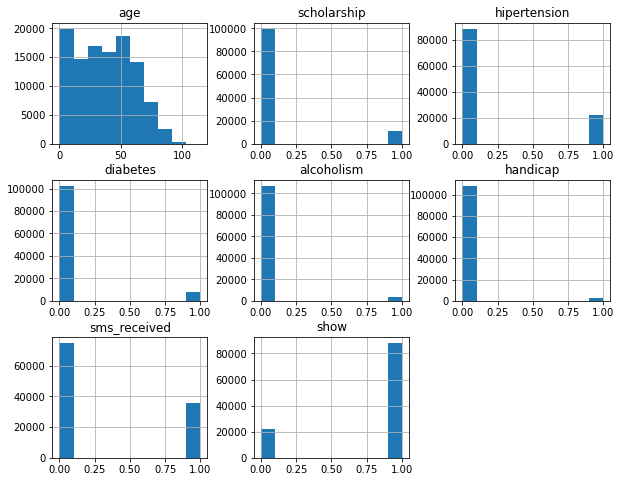

In [25]:
df.hist(figsize=(10,8));

#### First, let's categorize show column to showed and not shwoed.

In [26]:
showed = df.query('show == 1')
not_showed = df.query('show == 0')

#### Display the age distribution compared with patient attendance

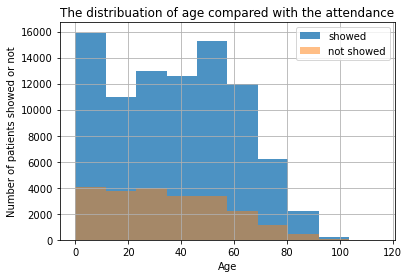

In [27]:
showed.age.hist(alpha =0.8, bins =10 ,label='showed')
not_showed.age.hist(alpha =0.5,bins =10, label='not showed')
plt.title("The distribuation of age compared with the attendance")
plt.xlabel("Age")
plt.ylabel("Number of patients showed or not");
plt.legend();

#### The above histogram is not clear, we need to categorize the age and see the histogram between [age group, show] and number of patients/appointments

In [57]:
##adding new column [age_group] to the dataframe

"""
0-2       Toddler
3-16      Kid
17-30     Young Adult
31-45     Middle Aged Adult
46-60     Old Adult
61-115    Senior"""

bins= [-1,3,17,31,46,61,116]
labels = ['Toddler','Kid','Young Adult','Middle Aged Adult', 'Old Adult', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Senior
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Old Adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Senior
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Kid
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Old Adult


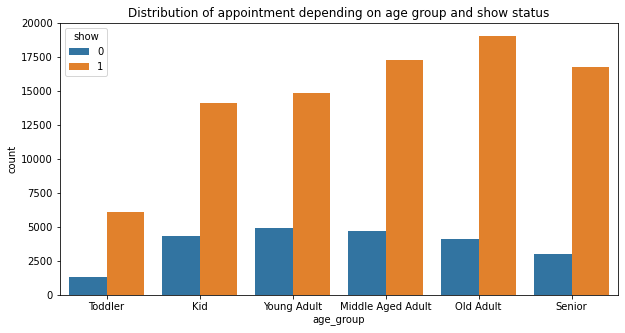

In [54]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df.age_group, hue=df.show)
ax.set_title("Distribution of appointment depending on age group and show status")
plt.show()

    -From the above chart, it seems that the old adults has the highest attendace rate
    -The seniors have the least rate to show up


### Research Question 2  (If the waiting days affect the attendance of the patients!)

#### Let's create a waiting days column to calculate the number of days the patients had to wait for their appointment.

In [62]:
df['waiting_days'] = (df.appointment_day - df.scheduled_day).dt.days
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,age_group,waiting_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Senior,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Old Adult,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Senior,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Kid,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Old Adult,0


#### Let's categorize the waiting days

In [63]:
##adding new column [waiting_group] to the dataframe
"""
0-0       Same day
1-7       One week
8-14      Two weeks
15-30     One month
31-90     Three months
91-180    Six months"""

bins= [-1,1,8,15,31,91,181]
labels = ['Same day','One week','Two weeks','One month', 'Three months', 'Six months']

df['waiting_group'] = pd.cut(df['waiting_days'], bins=bins, labels=labels, right=False)
df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,age_group,waiting_days,waiting_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Senior,0,Same day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Old Adult,0,Same day
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Senior,0,Same day
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Kid,0,Same day
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Old Adult,0,Same day


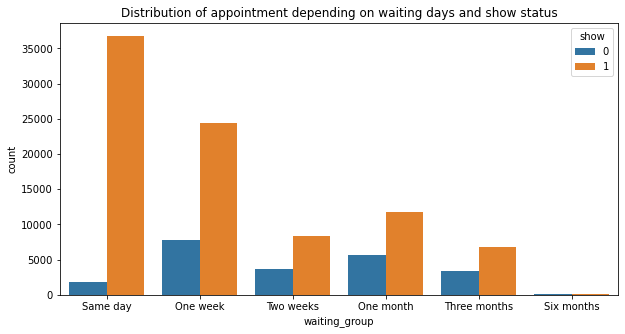

In [65]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df.waiting_group, hue=df.show)
ax.set_title("Distribution of appointment depending on waiting days and show status")
plt.show()

#### From the above chart it seems that the waiting days highly affected the attendance of the patient, the more days wait, the less patients attend.

### Research Question 3  (Do patients who received a message have a high attendance rate?!)

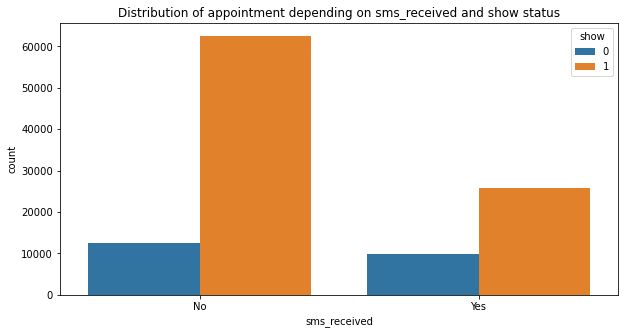

In [70]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df.sms_received, hue=df.show)
ax.set_title("Distribution of appointment depending on sms_received and show status")
ax.set_xticklabels(['No', 'Yes'])
plt.show()

from the above chart it seems that the patients who didn't receive sms have the highest rate of attendance.

<a id='conclusions'></a>
## Conclusions

>**Result:**
>
>*From the above investigation, we found that receiving sms doesn't affect the attaendance rate of the patients,  but the waiting days are highly affected the attendance of the patients especially if there is no waiting days, the same day appointment has the highest rate of attendance, the more days wait, the less patients attend. Also,it seems that the old adults have the highest attendace rate and the seniors have the least rate to show up.*
>
>
>**Limitations:**
>
>*In our analysis We did not observe the effect of people who have diseases on their attendance at the appointment *
>
>*There are some info are missing about some columns, for example SMS_RECIVED column, we found that the people who didn't recive an SMS has the highset rate of attendace which is not logical, we needed to know the reason behind sending the SMS.
>
